## Activity determination for *Rh*MOP against different oligo-mannosacharides

    Carried out on 220524, by Simon Birgersson


*Lund university, Center for Molecular Protein Science (CMPS), Henrik Stålbrand Group.*

*** 
**Purpose:**  

To determine acitivty for the *Rosburia hominis* mannophosporylase (*Rh*MOP) against different oligo-mannosacharides (MO:s).  
The idea is to see whether or not the enzyme prefers longer or shorter substrates, to fit into the discussion being prepared in the *R. hominis* cluster paper being constructed in the group currently.

    

* **Enzyme:** *Rh*MOP, stock from MW, 0.14 mg/ml in reaction
* **Substrate:** M2, M4, M5 10mM in reaction
* **Phosphate:** 10mM PO4 in reaction
* **Buffer:** 50mM Sodium Citrate pH 5.5
* **Time:** [0, 10] min sample points
* **Temperature:** T = 37°C
* **Absorbance** measured at  $\lambda$ = 620 nm
* Experiments carried out in 96 well sample plate


## Assay Protocol

1. Dilution of phosphate standard series. prepare 1 ml of 40 μM *Phosphate Premix solution* by mixing 40 μl of 1 mM phosphate standard solution with 960 μl of ultrapure H2O. Number each standard tube. Prepare 8 standard solution by mixing the *premix solution* and H2O according to the table below:

| # | Premix + H2O   | Final vol. [μl] | Phosphate conc [μM] | pmoles phosphate in 50 μl |
|---|----------------|-----------------|---------------------|---------------------------|
| 1 | 200 μl + 0 μl  | 200             | 40                  | 2.000                     |
| 2 | 160 μl + 40 μl | 200             | 32                  | 1.600                     |
| 3 | 120 μl + 80 μl | 200             | 24                  | 1.200                     |
| 4 | 80 μl + 120 μl | 200             | 16                  | 800                       |
| 5 | 60 μl + 140 μl | 200             | 12                  | 600                       |
| 6 | 40 μl + 160 μl | 200             | 8                   | 400                       |
| 7 | 20 μl + 180 μl | 200             | 4                   | 200                       |
| 8 | 0 μl + 200 μl  | 200             | 0                   | 0                         |

2. Transfer 50 μl of test sample (e.g, enzyme reaction) in duplicate into wells of the microplate. In the case of enzyme reactions, the reactions may be terminated by either adding a specific inhibitor or can be stopped directly by the addition of the *Malachite Green Reagent*. Reaction buffer can be added as a blank control for the samples.

3. Add 100 μl of the *Malachite Green Reagent* to each well. Mix by tapping the plate.

4. Incubate for 30 min at Room Temperature (RT)  for color development.

5. Measure absorbance at $\lambda$ = 600-660 nm on plate reader.

In [1]:
# initalization 
from utils.activity_assay import Standard,Enzyme # classes for storing data
import matplotlib.pyplot as plt # module for plotting data
import numpy as np # module for matrix operations
import pandas as pd

## Standard data
Here is where is input the standard data and handle raw data input, blanks, eventual points to remove, etc.

The class initilaztion will create std_name.fit, a regr object fitting the data to the equation:

$abs = c * slope + intercept$ 

and provide *slope* and *intercept* as callable variables, i.e "*std_name.fit.slope*"

In [2]:
# Standard data
# concentration values for standard series of PNP [uM]
std_c   = np.array([4,6,12,16,24,32,40])# [uM]

# raw data for std curve, absorbance values minus mean of blanks [AU]
std_abs = np.array([[0.207, 0.266, 0.335, 0.402, 0.544, 0.665, 0.792],[0.205, 0.263, 0.331, 0.416, 0.548, 0.661, 0.806]])-np.array([0.171,0.163]).mean()

# initialize standard object with measured absorbances.          
std = Standard(
        absorbance=std_abs,
        concentration=std_c,
        x_unit="μM",
        y_unit="AU",
    )


print(std) # show data in "table"

Standard Data: 
    μM  abs #1  abs #2  mean [AU]  +/- [AU]
0   4   0.040   0.038     0.0390    0.0010
1   6   0.099   0.096     0.0975    0.0015
2  12   0.168   0.164     0.1660    0.0020
3  16   0.235   0.249     0.2420    0.0070
4  24   0.377   0.381     0.3790    0.0020
5  32   0.498   0.494     0.4960    0.0020
6  40   0.625   0.639     0.6320    0.0070  

Resulting std equation is:

    abs = c * 0.02 + -0.02

With an R^2 of 0.9979


## Sample data
Here I input the raw data for my sample, same here all the raw data processing is done here before analysis. The standard equation in std.fit is inputted to get fitted concentrations for the sample. 

In [3]:
# Sample data

# dilution factors of protein stock
sample_dil = np.array([8.1/0.14]) # dilution factor

# stock enzyme concentration
RhMOP_stock_conc = 8.1 # mg/ml

# raw data for samples, absorbance values minus mean of enzyme blanks [AU]
RhMOP_M2_abs_0min  = np.array([[0.170],[0.170],[0.174]])-np.array([0.160,0.162]).mean() # [AU]
RhMOP_M2_abs_10min = np.array([[0.169],[0.174],[0.175]])-np.array([0.165,0.165]).mean() # [AU]

#initialize Enzyme objects
RhMOP_M2 = Enzyme(absorbance = RhMOP_M2_abs_10min - RhMOP_M2_abs_0min,
                Name= "RhMOP incubated with mannobiose",
                regr=std.fit,
                time=10.0,
                dilution_factor=sample_dil,
                x_unit = "μM",
            )

print(RhMOP_M2) # show data in "table"

# raw data for samples, absorbance values minus mean of enzyme blanks [AU]
RhMOP_M3_abs_0min = np.array([[0.171],[0.172],[0.176]])-np.array([0.161,0.164]).mean() # [AU]
RhMOP_M3_abs_10min = np.array([[0.170],[0.169],[0.171]])-np.array([0.167,0.173]).mean() # [AU]


RhMOP_M3 = Enzyme(absorbance = RhMOP_M3_abs_10min - RhMOP_M3_abs_0min,
                Name= "RhMOP incubated with mannotetraose",
                regr=std.fit,
                time=10.0,
                dilution_factor=sample_dil,
                x_unit = "uM",
            )

print(RhMOP_M3) # show data in "table"

# raw data for samples, absorbance values minus mean of enzyme blanks [AU]
RhMOP_M4_abs_0min  = np.array([[0.170],[0.174],[0.178]])-np.array([0.163,0.163]).mean() # [AU]
RhMOP_M4_abs_10min = np.array([[0.165],[0.164],[0.166]])-np.array([0.165,0.164]).mean() # [AU]


RhMOP_M4 = Enzyme(absorbance = RhMOP_M4_abs_10min - RhMOP_M4_abs_0min,
                Name= "RhMOP incubated with mannotetraose",
                regr=std.fit,
                time=10.0,
                dilution_factor=sample_dil,
                x_unit = "uM",
            )

print(RhMOP_M4) # show data in "table"

# raw data for samples, absorbance values minus mean of enzyme blanks [AU]
RhMOP_M5_abs_0min  = np.array([[0.171],[0.172],[0.177]])-np.array([0.163,0.166]).mean() # [AU]
RhMOP_M5_abs_10min = np.array([[0.165],[0.164],[0.168]])-np.array([0.163,0.163]).mean() # [AU]


RhMOP_M5 = Enzyme(absorbance = RhMOP_M5_abs_10min - RhMOP_M5_abs_0min,
                Name= "RhMOP incubated with mannopentaose",
                regr=std.fit,
                time=10.0,
                dilution_factor=sample_dil,
                x_unit = "uM",
            )

print(RhMOP_M5) # show data in "table"

RhMOP incubated with mannobiose: 
    abs #1        abs #2  abs #3  mean [AU]  +/- [AU]  conc. analyte [μM]  \
0  -0.005 -2.775558e-17  -0.003  -0.002667  0.002055            0.860778   

   +/- [μM]  activity [nkat/ml]  +/- [nkat/ml]  
0  1.152653            0.083004            0.0  
RhMOP incubated with mannotetraose: 
    abs #1  abs #2  abs #3  mean [AU]  +/- [AU]  conc. analyte [uM]  +/- [uM]  \
0 -0.0085 -0.0105 -0.0125    -0.0105  0.001633            0.376534  1.126577   

   activity [nkat/ml]  +/- [nkat/ml]  
0            0.036309            0.0  
RhMOP incubated with mannotetraose: 
    abs #1  abs #2  abs #3  mean [AU]  +/- [AU]  conc. analyte [uM]  +/- [uM]  \
0 -0.0065 -0.0115 -0.0135    -0.0105  0.002944            0.376534  1.207616   

   activity [nkat/ml]  +/- [nkat/ml]  
0            0.036309            0.0  
RhMOP incubated with mannopentaose: 
    abs #1  abs #2  abs #3  mean [AU]  +/- [AU]  conc. analyte [uM]  +/- [uM]  \
0 -0.0045 -0.0065 -0.0075  -0.006167  0.00

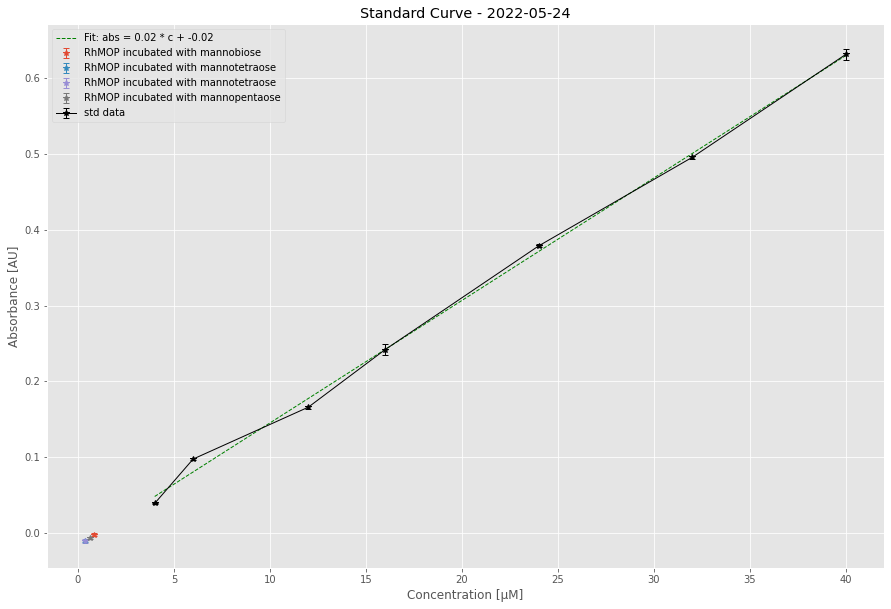

                    RhMOP incubated with mannobiose  \
abs #1                                -5.000000e-03   
abs #2                                -2.775558e-17   
abs #3                                -3.000000e-03   
mean [AU]                             -2.666667e-03   
+/- [AU]                               2.054805e-03   
conc. analyte [μM]                     8.607784e-01   
+/- [μM]                               1.152653e+00   
activity [nkat/ml]                     8.300363e-02   
+/- [nkat/ml]                          0.000000e+00   

                    RhMOP incubated with mannotetraose  \
abs #1                                       -0.006500   
abs #2                                       -0.011500   
abs #3                                       -0.013500   
mean [AU]                                    -0.010500   
+/- [AU]                                      0.002944   
conc. analyte [μM]                                 NaN   
+/- [μM]                                   

In [7]:
# Print the results:
plt.figure(figsize=[15,10]) # create figure object
plt.style.use('ggplot')

 # plot sample data in current fig
RhMOP_M2.plot()
RhMOP_M3.plot()
RhMOP_M4.plot() 
RhMOP_M5.plot() 

std.plot() # plot std data in current fig

plt.show() # render figure object

df = pd.DataFrame()
df[RhMOP_M2.name] = RhMOP_M2.df.transpose()
df[RhMOP_M3.name] = RhMOP_M3.df.transpose()
df[RhMOP_M4.name] = RhMOP_M4.df.transpose()
df[RhMOP_M5.name] = RhMOP_M5.df.transpose()
print(df)

## Conclusions
<p> It's clear that there is no signal in any of the sample wells, as no absorbance (i.e PO4) is detected. Overall, the standard curve looks very good, so the assay seems to be functional.
<p> Either there was no activity in the reaction, or something went wrong with the dilution before the assay. When assembling the reaction, 1 ul of the protein stock is added, which might be a large source of error.

220525 update: used 0.81 mg/ml stock instead of 8.1 mg/ml